In [1]:
import pickle
import numpy as np
import NAFFlib as pnf
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
select_study = 'steps'
path2files = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/sps_270GeV_wakesON_complete_3sigma_QpxQpy2_Nb5e5_turns40000_ayy0_slices'
intensity_list = np.linspace(0, 5e10, 5)
slices_list = list(np.linspace(500, 20e3, 10, dtype=int))
slices_list = [500]
#slices_list = list(np.linspace(10, 1000, 10, dtype=int))

Qx_frac, Qy_frac = 0.13, 0.18

### Load txt files from simulations and compute the tune using NAFFlib

In [4]:
Qx_dict, Qy_dict = {}, {}

for slices in slices_list:
    Qx_dict[f'{slices} slices'], Qy_dict[f'{slices} slices'] = [], []
    # Add tunes for intensity 0, there should be no tune shift
    Qx_dict[f'{slices} slices'].insert(0, 0.13)
    Qy_dict[f'{slices} slices'].insert(0, 0.18)
    
    study_suffix = f'{slices}_fixedKicksSet0_run0'
    for intensity in intensity_list[1:]:
        # Load the file with all of the saved data from the run
        meanX, meanY = np.loadtxt(f'{path2files}{study_suffix}/file_intensity{intensity/1e10:.2f}e10_ayy0.0_QpyQpx2.txt', delimiter = ",", unpack = True)

        Qx_dict[f'{slices} slices'].append(pnf.get_tune(meanX))
        Qy_dict[f'{slices} slices'].append(pnf.get_tune(meanY))


### Save the tunes in pickle files for easier access and use in the future 

In [5]:
save2pickle = True

for slices in slices_list:
    if save2pickle:
        with open(f'./output/Qy_coherent_vs_Intensity_6D_ayy0_QpxQpy_wakesON_{select_study}_slices{slices}.pkl', 'wb') as ff:
            pickle.dump(Qy_dict[f'{slices} slices'], ff, pickle.HIGHEST_PROTOCOL)
        ff.close()

    if save2pickle:
        with open(f'./output/Qx_coherent_vs_Intensity_6D_ayy0_QpxQpy_wakesON_{select_study}_slices{slices}.pkl', 'wb') as ff:
            pickle.dump(Qx_dict[f'{slices} slices'], ff, pickle.HIGHEST_PROTOCOL)
        ff.close()

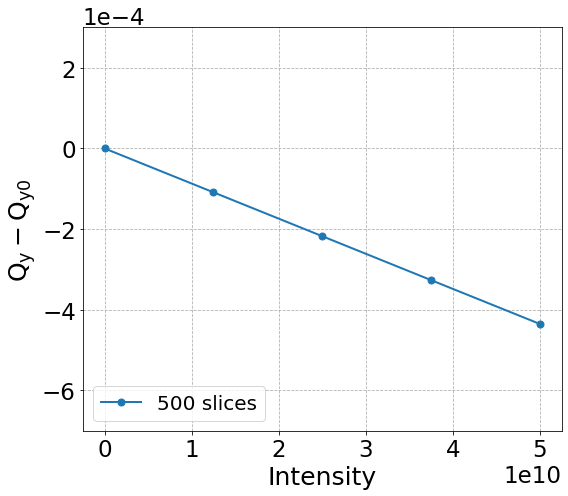

In [7]:
fig, ax = plt.subplots(1,1)

for slices in slices_list:
    ax.plot(intensity_list, np.array(Qy_dict[f'{slices} slices']) - Qy_frac, '-o', label=f'{slices} slices')
    

    ax.set_ylabel(r'$\mathrm{Q_y-Q_{y0}}$')
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.set_xlabel('Intensity')
    ax.grid(linestyle='dashed')
    ax.legend(loc=3)

    plt.tight_layout()

    # axis limits
    
    plt.ylim(-7e-4, 3e-4)#3e-5
    #plt.ylim(-10e-5, 5e-5)#3e-5

    savefig = True
    if savefig:
        plt.savefig(f'./output/TuneShift_vs_Intensity_Q26wakes_ayy0_QpxQpy0_{select_study}_smallSliceNumber.png', bbox_inches='tight')